In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
from sklearn.model_selection import train_test_split
df=pd.read_csv("profiles.csv")

In [2]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df=df.drop_duplicates()[:9514]

### İçeriği çok fazla null olan essay sütunlarını siliyoruz

In [5]:
for i in df:
    if ("essay" in i):
        df.drop(i,axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 0 to 9513
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   ethnicity    8565 non-null   object 
 7   height       9514 non-null   float64
 8   income       9514 non-null   float64
 9   job          8183 non-null   object 
 10  last_online  9514 non-null   object 
 11  location     9514 non-null   object 
 12  offspring    3886 non-null   object 
 13  orientation  9514 non-null   object 
 14  pets         6352 non-null   object 
 15  religion     6261 non-null   object 
 16  sex          9514 non-null   object 
 17  sign         7776 non-null   object 
 18  smokes       8596 non-null   object 
 19  speaks

In [7]:
skinnystatus={"average":"fit",
              "fit":"fit",
              "athletic":"fit",
              "thin":"fit",
              "curvy":"curvy",
              "a little extra":"curvy",
              "skinny":"fit",
              "full figured":"curvy",
              "overweight":"bad",
              "jacked":"bad",
              "used up":"bad",
              "rather not say":"curvy"
             }
df.body_type.replace(skinnystatus,inplace=True)

<AxesSubplot:>

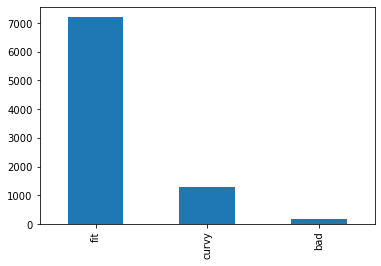

In [8]:
df.body_type.value_counts().plot.bar()

<AxesSubplot:>

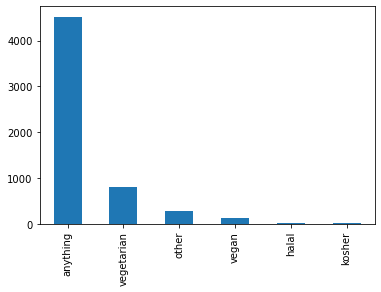

In [9]:
status={"mostly":"","strictly":""}
df["diet"].replace(status,regex=True,inplace=True)
df["diet"]=df["diet"].str.strip()
df["diet"].value_counts().plot.bar()

<AxesSubplot:>

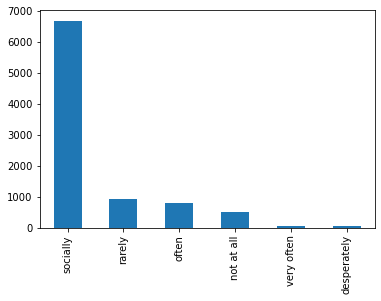

In [10]:
df.drinks.value_counts().plot.bar()

<AxesSubplot:>

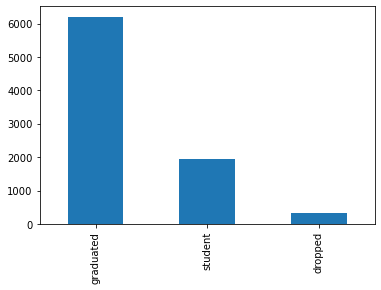

In [11]:
df["education"].replace({"working on":"student","graduated from":"graduated","dropped out":"dropped"},regex=True)
df["education"]=df["education"].str.split().str[0]
df["education"].replace({"college/university":"student","two-year":"student","masters":"student","working":"student","space":"student","ph.d":"graduated","law":"graduated","high":"graduated"},regex=True,inplace=True)
df["education"].value_counts().plot.bar()

In [12]:
df.drop(["ethnicity","job"],axis=1,inplace=True)

<AxesSubplot:xlabel='height'>

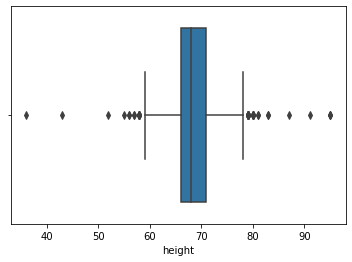

In [13]:
sns.boxplot("height",data=df)

<AxesSubplot:xlabel='income'>

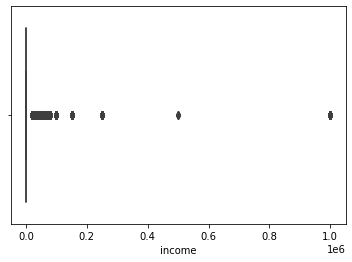

In [14]:
sns.boxplot("income",data=df)

In [17]:
df['last_online']

0       2012-06-28-20-30
1       2012-06-29-21-41
2       2012-06-27-09-10
3       2012-06-28-14-22
4       2012-06-27-21-26
              ...       
9509    2012-06-30-02-49
9510    2012-04-05-21-46
9511    2012-04-28-12-42
9512    2012-03-01-15-17
9513    2012-06-14-15-14
Name: last_online, Length: 9514, dtype: object

<AxesSubplot:xlabel='last_online_year', ylabel='count'>

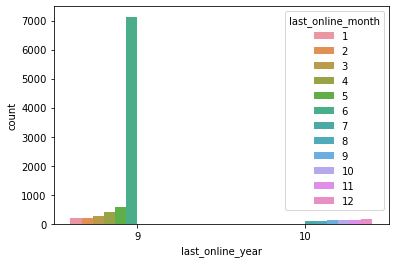

In [15]:
df["last_online_year"]=2021-(df['last_online'].str[:4]).astype(int)
df["last_online_month"]=(df['last_online'].str[5:7]).astype(int)
df.drop('last_online',axis=1)
sns.countplot("last_online_year",hue="last_online_month",data=df)

<AxesSubplot:>

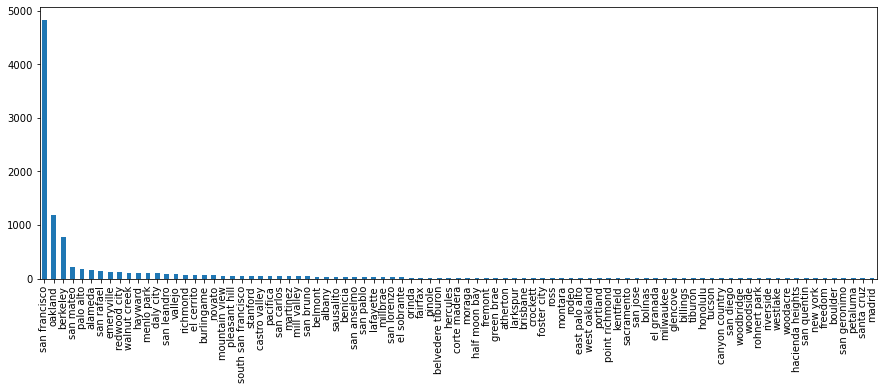

In [18]:
df.location=df.location.str.split(",").str[0]
plt.figure(figsize=(15,5))
df.location.value_counts().plot.bar()

<AxesSubplot:>

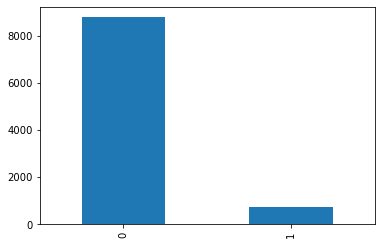

In [19]:
offsprings=[]
for i in df.offspring.fillna("bilinmiyor").str.replace("[^\w\s]",""):
    if "doesnrsquot" in i:
        offsprings.append("0")
    elif "bilinmiyor" in i:
        offsprings.append("0")
    else:
        offsprings.append("1")
        
df["offspring"]=offsprings
df["offspring"]=df["offspring"].astype(int)
df["offspring"].value_counts().plot.bar()

<AxesSubplot:>

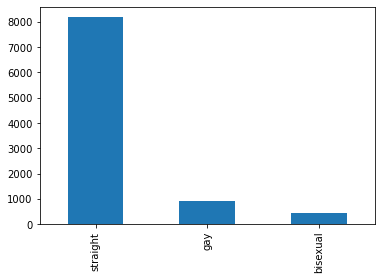

In [20]:
df.orientation.value_counts().plot.bar()

<AxesSubplot:>

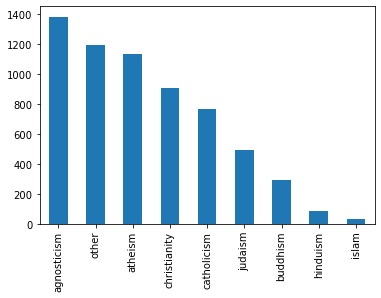

In [21]:
df["religion"]=df["religion"].str.split().str[0]
df["religion"].value_counts().plot.bar()

<AxesSubplot:>

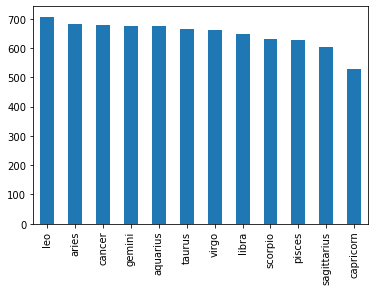

In [22]:
df["sign"]=df["sign"].str.split().str[0]
df["sign"].value_counts().plot.bar()

In [23]:
df["number_of_fluent_languages"]=df.speaks.str.count("fluently")
df["number_of_fluent_languages"].replace(0,1,regex=True,inplace=True)
df["number_of_poorly_languages"]=df.speaks.str.count("poorly")
df.drop("speaks",axis=1,inplace=True)

In [24]:
for column in df.select_dtypes(include=np.number):
    df[column].fillna(df[column].median(),inplace=True) #ortalama değerler ile dolduruyoruz

In [25]:
for column in df.select_dtypes(include=np.object):
    df[column].fillna(df[column].mode()[0],inplace=True) #object türünden olan ifadeler en çok tekrar eden ile dolduruypruz

In [26]:
df.isnull().sum()

age                           0
body_type                     0
diet                          0
drinks                        0
drugs                         0
education                     0
height                        0
income                        0
last_online                   0
location                      0
offspring                     0
orientation                   0
pets                          0
religion                      0
sex                           0
sign                          0
smokes                        0
status                        0
last_online_year              0
last_online_month             0
number_of_fluent_languages    0
number_of_poorly_languages    0
dtype: int64

In [27]:
df.shape

(9514, 22)

In [28]:
epoch=[]
for i in df["age"].values:
    if (i>=18) and (i<=32):
        epoch.append("Millennial")
    elif (i>=33) and (i<=47):
        epoch.append("Gen X-er")
    elif (48>=33) and (i<=70):
        epoch.append("Boomers")
    else:
        epoch.append("Unkown")

df["epoch"]=epoch

<AxesSubplot:>

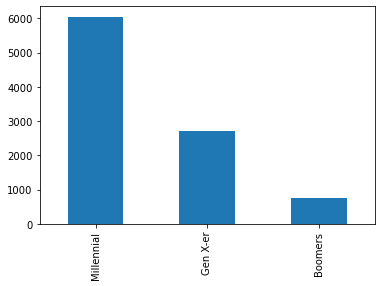

In [29]:
df["epoch"].replace("Unkown","Boomers",regex=True,inplace=True)
df["epoch"].value_counts().plot.bar()

In [70]:
df["epoch"]= df["epoch"].map({"Millennial":0,"Gen X-er":1,"Boomers":2})

In [30]:
df.corr()

,age,height,income,offspring,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages
age,1.000000,-0.022078,0.011424,0.341753,-0.015792,-0.003527,-0.024795,-0.001559
height,-0.022078,1.000000,0.073105,-0.033389,-0.016633,-0.010858,0.015458,0.036414
income,0.011424,0.073105,1.000000,0.015045,0.009376,0.002043,0.039186,0.028577
offspring,0.341753,-0.033389,0.015045,1.000000,0.029129,0.005697,0.000841,-0.012303
last_online_year,-0.015792,-0.016633,0.009376,0.029129,1.000000,0.685183,-0.003813,-0.034827
last_online_month,-0.003527,-0.010858,0.002043,0.005697,0.685183,1.000000,-0.006593,-0.006141
number_of_fluent_languages,-0.024795,0.015458,0.039186,0.000841,-0.003813,-0.006593,1.000000,0.067774
number_of_poorly_languages,-0.001559,0.036414,0.028577,-0.012303,-0.034827,-0.006141,0.067774,1.000000


In [31]:
df.describe()

,age,height,income,offspring,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages
count,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155,0.076624,9.077255,5.864936,1.146941,0.338974
std,9.445488,3.905229,91428.807808,0.266008,0.267009,1.627365,0.413248,0.645990
min,18.000000,36.000000,-1.000000,0.000000,9.000000,1.000000,1.000000,0.000000
25%,25.000000,66.000000,-1.000000,0.000000,9.000000,6.000000,1.000000,0.000000
50%,30.000000,68.000000,-1.000000,0.000000,9.000000,6.000000,1.000000,0.000000
75%,36.000000,71.000000,-1.000000,0.000000,9.000000,6.000000,1.000000,1.000000
max,110.000000,95.000000,1000000.000000,1.000000,10.000000,12.000000,5.000000,5.000000


<AxesSubplot:>

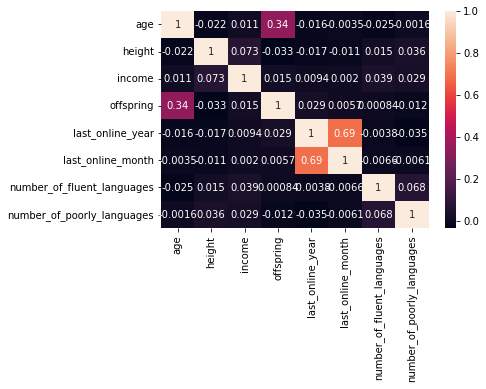

In [32]:
sns.heatmap(df.corr(),annot=True)

### Flört arkadaşınız yaşınızı tahmin edebilir mi?

In [33]:
df_reg=pd.get_dummies(df,drop_first=True)

In [34]:
df_reg.shape

(9514, 6919)

In [35]:
x,y=df_reg.drop("age",axis=1),df[["age"]]

In [36]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [37]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.853302,3.651384,2.973600
Ridge,0.837541,3.842541,3.093045
LinearRegression,0.804106,4.219453,3.359626
ExtraTreeRegressor,0.732299,4.932546,3.819233
Lasso,0.572190,6.235505,4.213471
KNeighborsRegressor,0.448128,7.082153,4.724120
ElasticNet,0.308607,7.926994,5.422564


In [38]:
# Verileri Deep Learning ile tekrar yordamlıyoruz

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [40]:
x=scaler.fit_transform(x)

In [41]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,6868,6869,6870,6871,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,6912,6913,6914,6915,6916,6917
0,0.661017,0.000000,0.0,0.0,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.576271,0.080001,0.0,0.0,0.454545,0.0,0.4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.542373,0.000000,0.0,0.0,0.454545,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.593220,0.020001,0.0,0.0,0.454545,0.0,0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.508475,0.000000,0.0,0.0,0.454545,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [42]:
x.shape,y.shape

((9514, 6918), (9514, 1))

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [45]:
model=Sequential()
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse') 

In [46]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=100, verbose=1)

Epoch 1/100
60/60 [==============================] - 5s 71ms/step - loss: 149.7973 - val_loss: 31.1716
Epoch 2/100
60/60 [==============================] - 4s 61ms/step - loss: 15.9888 - val_loss: 19.8453
Epoch 3/100
60/60 [==============================] - 4s 61ms/step - loss: 6.3584 - val_loss: 19.7910
Epoch 4/100
60/60 [==============================] - 4s 67ms/step - loss: 3.8242 - val_loss: 18.5384
Epoch 5/100
60/60 [==============================] - 4s 72ms/step - loss: 3.0625 - val_loss: 18.1235
Epoch 6/100
60/60 [==============================] - 4s 72ms/step - loss: 2.5815 - val_loss: 18.4663
Epoch 7/100
60/60 [==============================] - 4s 73ms/step - loss: 2.3122 - val_loss: 18.5486
Epoch 8/100
60/60 [==============================] - 4s 69ms/step - loss: 2.1125 - val_loss: 18.8003
Epoch 9/100
60/60 [==============================] - 4s 71ms/step - loss: 2.0790 - val_loss: 19.0744
Epoch 10/100
60/60 [==============================] - 4s 72ms/step - loss: 1.8092 - val_

60/60 [==============================] - 4s 67ms/step - loss: 0.0646 - val_loss: 17.3279
Epoch 82/100
60/60 [==============================] - 4s 68ms/step - loss: 0.0976 - val_loss: 17.2612
Epoch 83/100
60/60 [==============================] - 4s 67ms/step - loss: 0.2244 - val_loss: 17.8405
Epoch 84/100
60/60 [==============================] - 4s 67ms/step - loss: 0.9165 - val_loss: 17.4832
Epoch 85/100
60/60 [==============================] - 4s 67ms/step - loss: 2.2452 - val_loss: 20.8251
Epoch 86/100
60/60 [==============================] - 4s 67ms/step - loss: 2.4221 - val_loss: 19.9091
Epoch 87/100
60/60 [==============================] - 4s 67ms/step - loss: 1.7425 - val_loss: 17.1114
Epoch 88/100
60/60 [==============================] - 4s 69ms/step - loss: 1.1580 - val_loss: 16.8235
Epoch 89/100
60/60 [==============================] - 4s 70ms/step - loss: 0.7743 - val_loss: 18.1888
Epoch 90/100
60/60 [==============================] - 4s 68ms/step - loss: 0.3285 - val_loss: 1

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               5535200   
                                                                 
 dense_1 (Dense)             (None, 800)               640800    
                                                                 
 dense_2 (Dense)             (None, 800)               640800    
                                                                 
 dense_3 (Dense)             (None, 800)               640800    
                                                                 
 dense_4 (Dense)             (None, 800)               640800    
                                                                 
 dense_5 (Dense)             (None, 800)               640800    
                                                                 
 dense_6 (Dense)             (None, 1)                 8

In [48]:
pred=model.predict(x_test)

60/60 [==============================] - 1s 10ms/step


In [49]:
(mean_squared_error(y_test,pred))**.5

4.216382785844164

In [50]:
r2_score(y_test,pred)

0.8043913498693702

In [51]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [71]:
y=df[["epoch"]]

In [72]:
df_class=df.drop("epoch",axis=1)
x=pd.get_dummies(df_class,drop_first=True)

In [73]:
classification_funct(x,y)

,accuracy_score
DecisionTreeClassifier,1.000000
XGBClassifier,1.000000
KNeighborsClassifier,0.987914
GaussianNB,0.963741
RandomForestClassifier,0.942197
LogisticRegression,0.873358
BernoulliNB,0.662112
SVC,0.647399


In [ ]:
#Age alanını kaldırarak tekrar çalıştırıyoruz
# epoch alanı ile ilgili mapping işlemi uygulanıp tekrar çalıştırıyoruz

In [74]:
df_class=df.drop(["epoch","age"],axis=1)
x=pd.get_dummies(df_class,drop_first=True)

In [75]:
classification_funct(x,y)

,accuracy_score
XGBClassifier,0.676301
RandomForestClassifier,0.674199
BernoulliNB,0.662112
SVC,0.647399
GaussianNB,0.642144
LogisticRegression,0.642144
DecisionTreeClassifier,0.624803
KNeighborsClassifier,0.622701


### Bu çalışma "https://github.com/enes-asan/Three-generations-seeking-romance---Regression-Classification-main/blob/main/Three-generations-seeking-romance---Regression-Classification-main.ipynb" adresinde ki çalışmadan referans alınarak hazırlanmıştır. Genel konuların tekrarı yapılıp üzerinden geçilmiştir.